# DiscreteLab №2: Huffman, LZW and LZ77
### Held by: Eugene Bevz and Tymofii Shevchenko

In [5]:
import time
import matplotlib.pyplot as plt
import os

## LZW algorithm (Tymofii Shevchenko)

Here we studied the LZW algorithm for encoding and decoding messages.

In [8]:
"""
LZW compression
"""

class Lzw:
    def __init__(self) -> None:
        self.encode_dict = {chr(i): i for i in range(256)}
        self.decode_dict = {i: chr(i) for i in range(256)}


    def encode(self, seq: str) -> list[int]:
        """
        Compress message.

        :param seq: string sequence to be compressed
        :return: list of numbers
        """
        add_dict = {}
        idx = 256
        pre_symbol = ""
        codes = []

        for symbol in seq:
            ps = pre_symbol+symbol
            if ps in self.encode_dict | add_dict:
                pre_symbol = ps
            else:
                try:
                    codes.append(self.encode_dict[pre_symbol])
                except KeyError:
                    codes.append(add_dict[pre_symbol])
                add_dict[ps] = idx
                idx += 1
                pre_symbol = symbol

        if pre_symbol != '':
            try:
                codes.append(self.encode_dict[pre_symbol])
            except KeyError:
                codes.append(add_dict[pre_symbol])
        return codes


    def decode(self, codes: list[int]) -> str:
        """
        Decompress data.

        :param codes: list of numbers
        :return: original string
        """
        add_dict = {}
        idx = 256
        result = []
        pre_symbol = codes.pop(0)
        result.append(self.decode_dict[pre_symbol])

        for symbol in codes:
            if symbol in self.decode_dict | add_dict:
                try:
                    entry = self.decode_dict[symbol]
                except KeyError:
                    entry = add_dict[symbol]
            result.append(entry)
            try:
                add_dict[idx] = self.decode_dict[pre_symbol] + entry[0]
            except KeyError:
                add_dict[idx] = add_dict[pre_symbol] + entry[0]
            idx += 1
            pre_symbol = symbol
        return ''.join(result)

In [3]:
def read_file(filename: str) -> str:
    """
    Read file with message and return list of lines
    which will be encoded with Huffman algorithm. For now,
    we will assume that message consists of one line.

    :param filename: file with text to open
    :return: list of message lines
    """
    with open(filename, "r") as file:
        return file.read()

## Analising speed

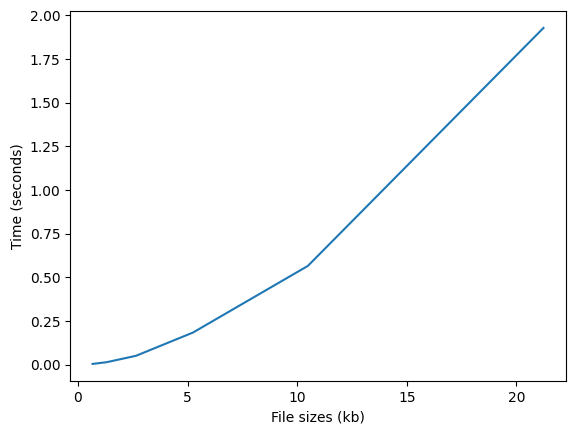

In [32]:
lzw = Lzw()


t = []
sizes = []
for file in sorted(os.listdir('test_files/')):
    data = read_file('test_files/'+ file)
    sizes.append(os.path.getsize('test_files/'+ file)/1024)
    timings = []
    for i in range(5):
        start = time.time()
        lzw.encode(data)
        stop = time.time()
        timings.append(stop - start)
    t.append(sum(timings) / len(timings))

plt.plot(sorted(sizes), sorted(t))

plt.ylabel('Time (seconds)')
plt.xlabel('File sizes (kb)')
plt.show()